### Compilation of all of our team members' exploratory data analysis.

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pokemon = pd.read_csv('pokemon.csv', encoding='latin1')
combat = pd.read_csv('combats.csv', encoding='latin1')

In [21]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [22]:
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


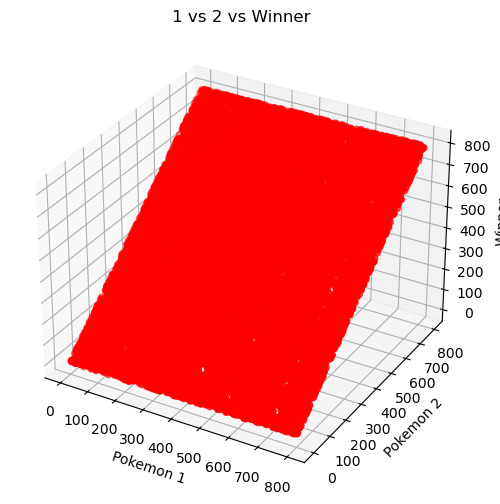

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(combat['First_pokemon'], combat['Second_pokemon'], combat['Winner'], color='red', marker='o')
ax.set_xlabel('Pokemon 1')
ax.set_ylabel('Pokemon 2')
ax.set_zlabel('Winner')
ax.set_title('1 vs 2 vs Winner')

plt.show()

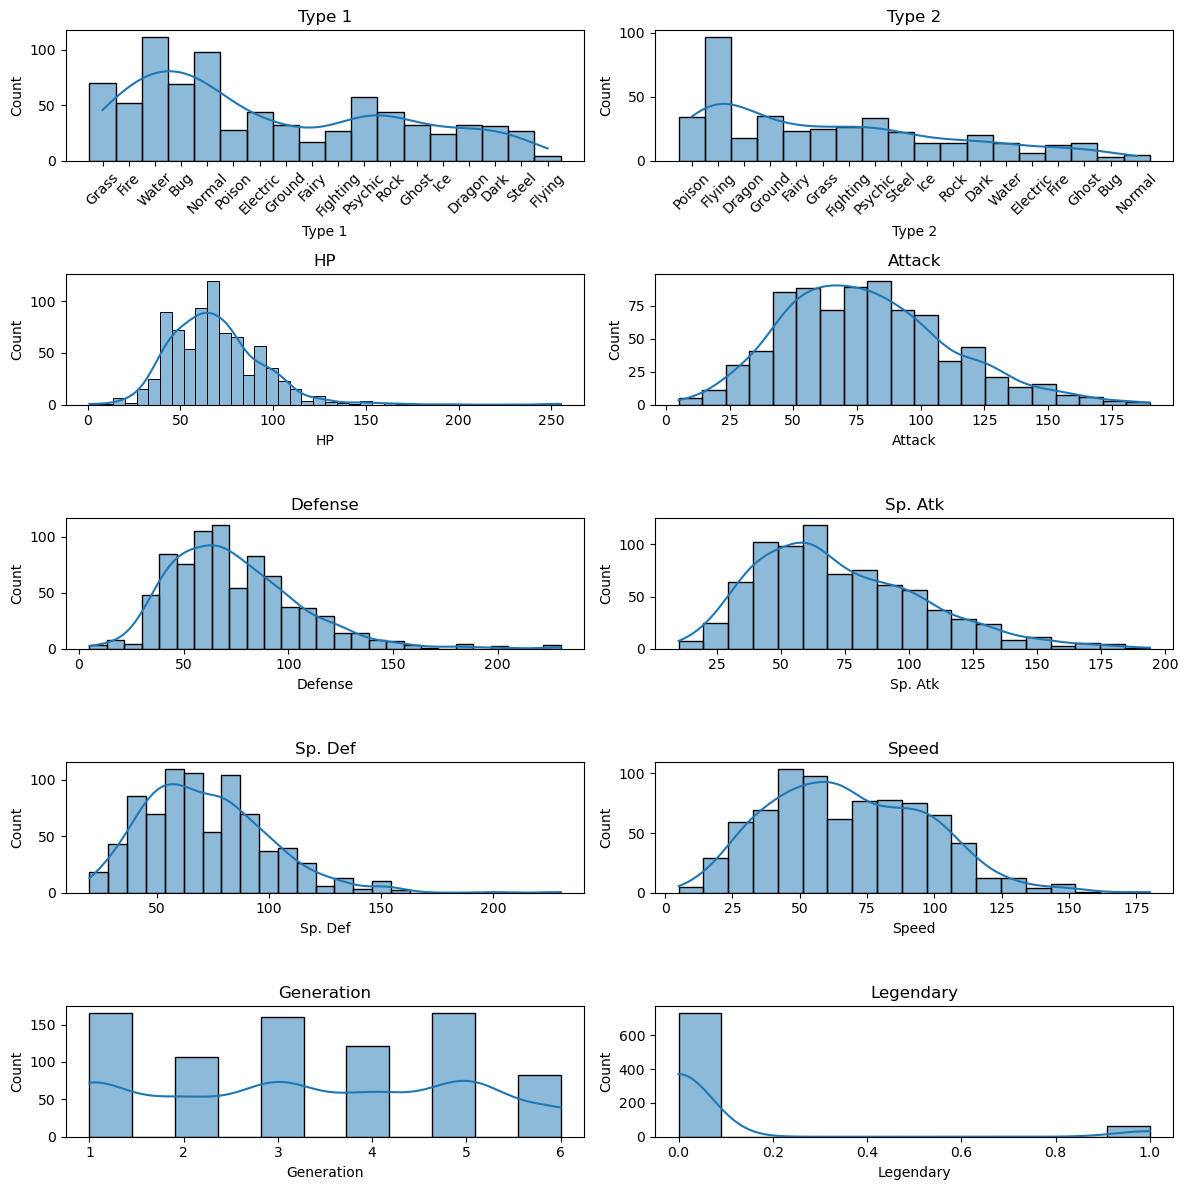

In [12]:
# Plot histograms for some of the features
features_to_plot = ['Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']
plt.figure(figsize=(12, 12))
for i, feature in enumerate(features_to_plot, 1):
    ax = plt.subplot(5, 2, i)
    sns.histplot(pokemon[feature], kde=True, ax=ax)
    plt.title(feature)
    
    if feature in ['Type 1', 'Type 2']:
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Just plotting the numerical features:

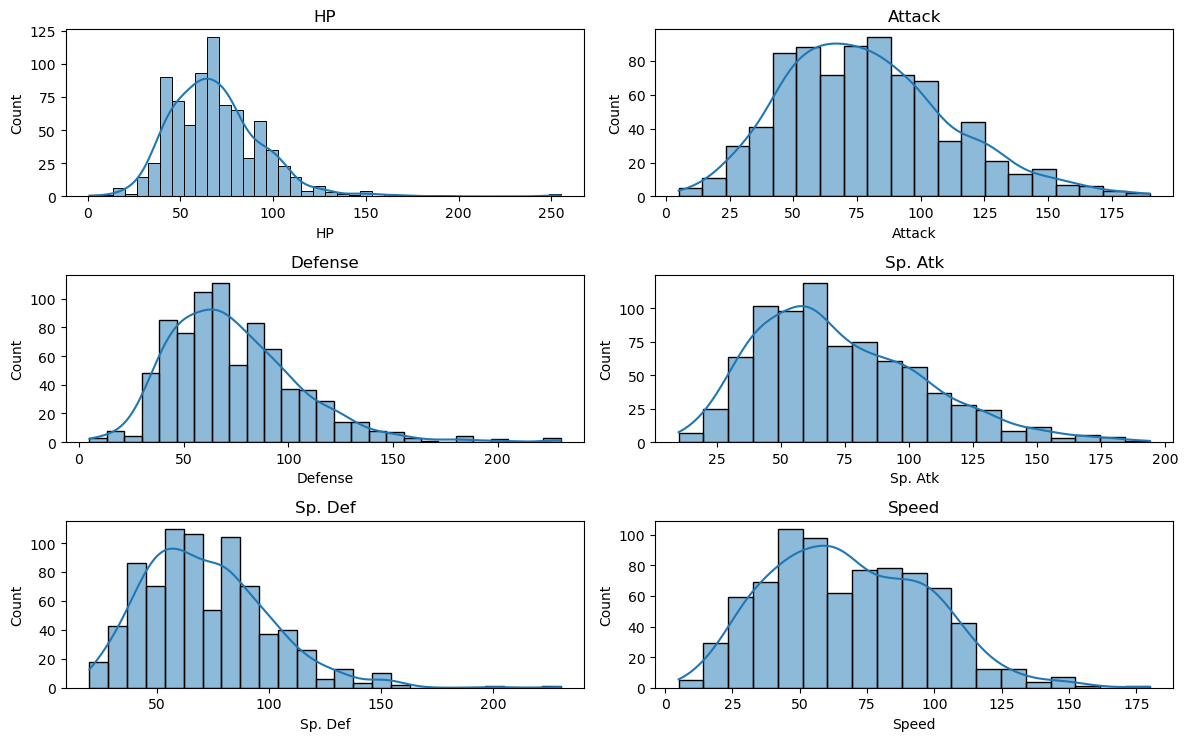

In [13]:
features_to_plot = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
plt.figure(figsize=(12, 12))
for i, feature in enumerate(features_to_plot, 1):
    ax = plt.subplot(5, 2, i)
    sns.histplot(pokemon[feature], kde=True, ax=ax)
    plt.title(feature)
    

plt.tight_layout()
plt.show()

All of our numerical features are right skewed.

The six numerical features should be normalized so that they are all on the same scale. 

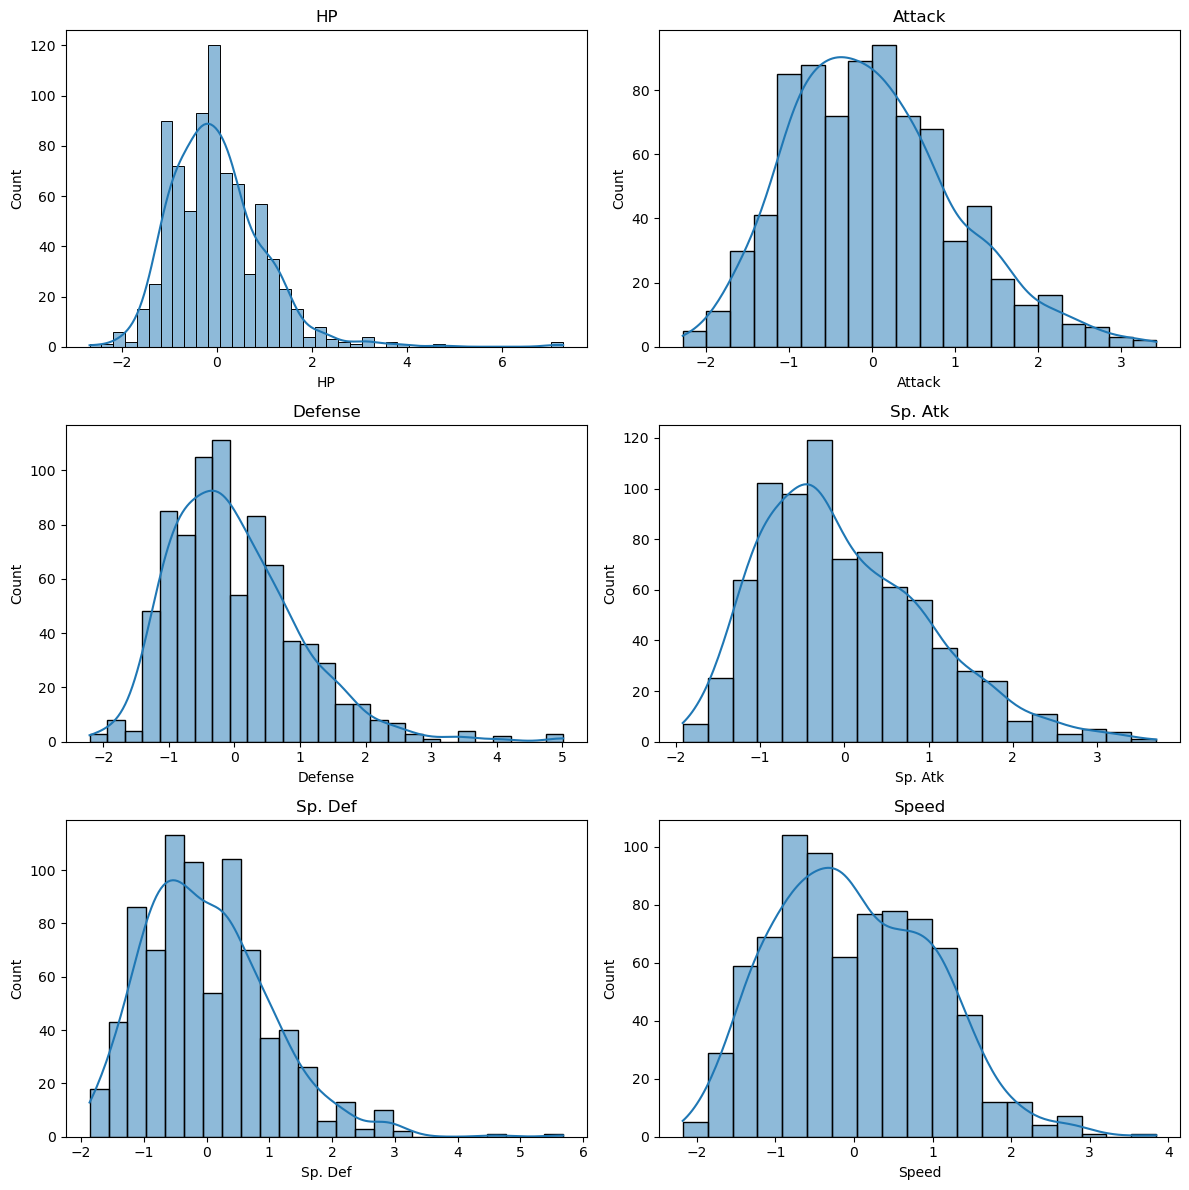

In [14]:
from sklearn.preprocessing import StandardScaler

# Create StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features
features_to_plot = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
pokemon[features_to_plot] = scaler.fit_transform(pokemon[features_to_plot])

# Plot histograms for numerical features
plt.figure(figsize=(12, 12))
for i, feature in enumerate(features_to_plot, 1):
    ax = plt.subplot(3, 2, i)
    sns.histplot(pokemon[feature], kde=True, ax=ax)
    plt.title(feature)

plt.tight_layout()
plt.show()

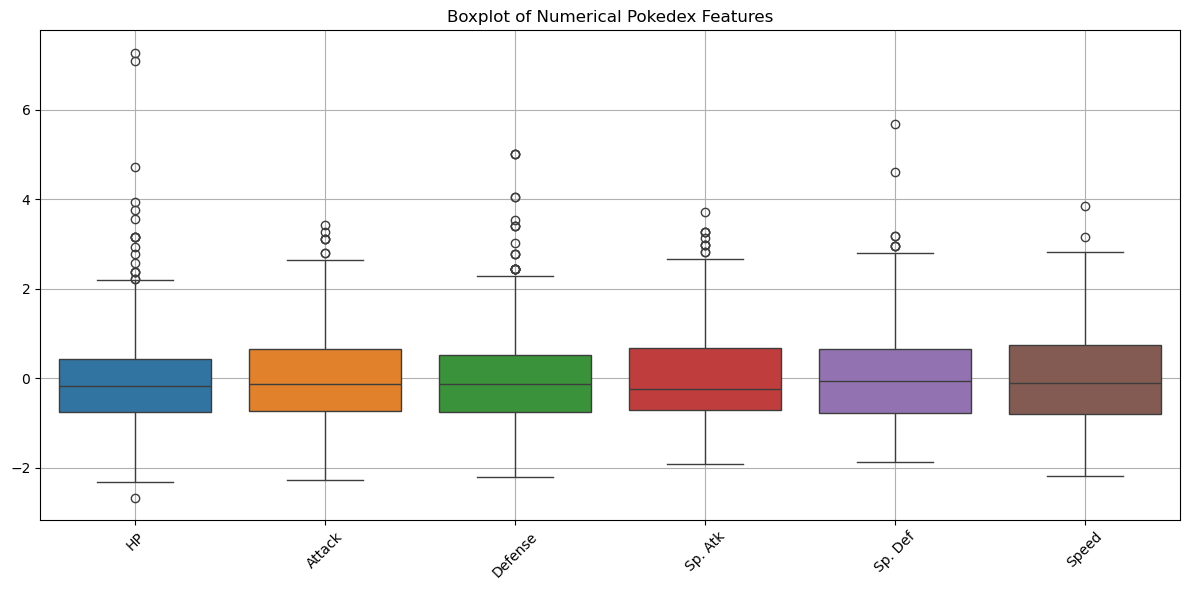

In [15]:
# Plot boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=pokemon[features_to_plot])
plt.title('Boxplot of Numerical Pokedex Features')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
for f in features_to_plot:
	Q1 = pokemon[f].quantile(0.25)
	Q3 = pokemon[f].quantile(0.75)
	lower_bound = Q1 - 1.5 * (Q3 - Q1)
	upper_bound = Q3 + 1.5 * (Q3 - Q1)
	outliers = pokemon[(pokemon[f] < lower_bound) | (pokemon[f] > upper_bound)][f]
	print(f"{f}: {len(outliers)} outliers (lower: {lower_bound:.2f}, upper: {upper_bound:.2f})")
	print(f"Outliers:\n {outliers}")

HP: 19 outliers (lower: -2.52, upper: 2.18)
Outliers:
 45     2.772133
121    7.082697
142    2.380264
145    2.380264
155    3.555872
217    4.731480
261    7.278632
313    3.164003
316   -2.674852
321    2.928881
350    2.380264
351    3.947741
473    3.164003
495    2.576199
544    3.164003
545    3.164003
655    3.751807
792    2.223516
793    2.223516
Name: HP, dtype: float64
Attack: 7 outliers (lower: -2.82, upper: 2.73)
Outliers:
 163    3.421972
232    3.267827
424    3.113683
426    3.113683
429    3.113683
494    2.805393
711    2.805393
Name: Attack, dtype: float64
Defense: 20 outliers (lower: -2.69, upper: 2.44)
Outliers:
 87     3.406414
98     3.406414
103    2.764648
223    4.048180
224    5.010829
230    5.010829
268    2.443765
332    3.406414
333    5.010829
413    2.443765
414    4.048180
416    2.443765
424    2.764648
430    2.764648
456    3.021354
749    2.443765
751    2.443765
773    2.443765
789    3.534767
795    2.443765
Name: Defense, dtype: float64
Sp. Atk

HP range: 4.7, Attack Range: 5.55, Defense: 5.13, Sp. Attack: 5.53, Sp. Defense: 5.75, Speed: 6.2

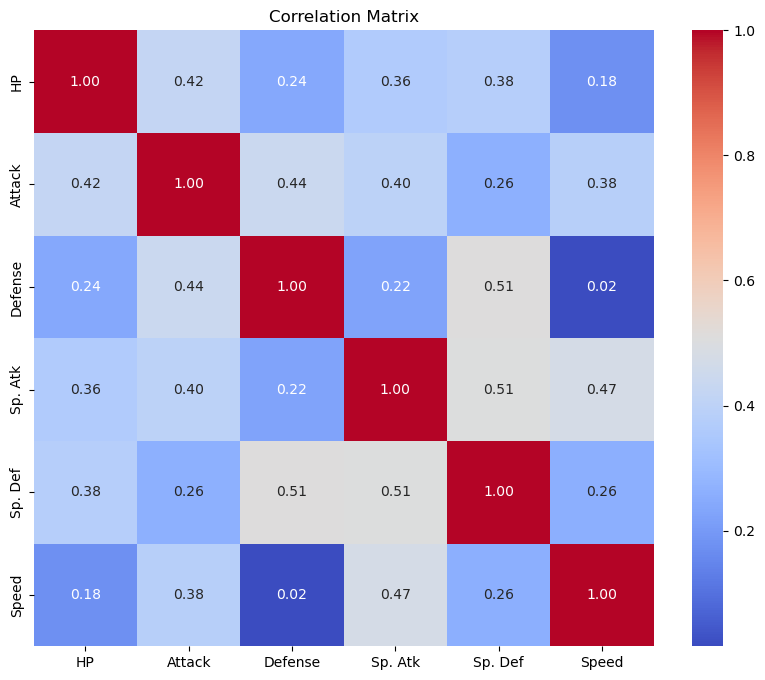

In [17]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = pokemon[features_to_plot].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

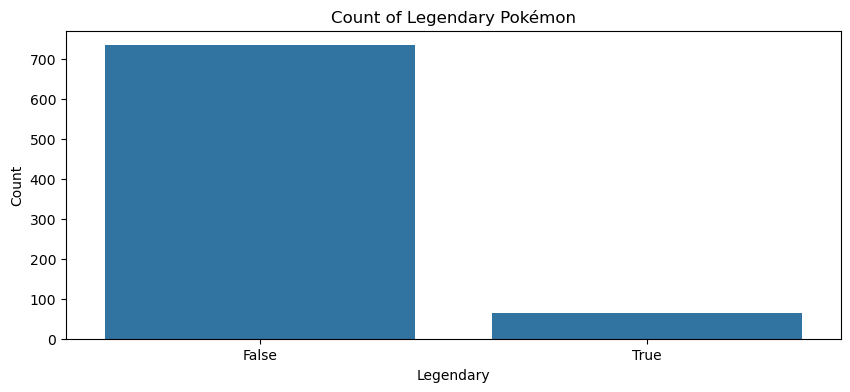

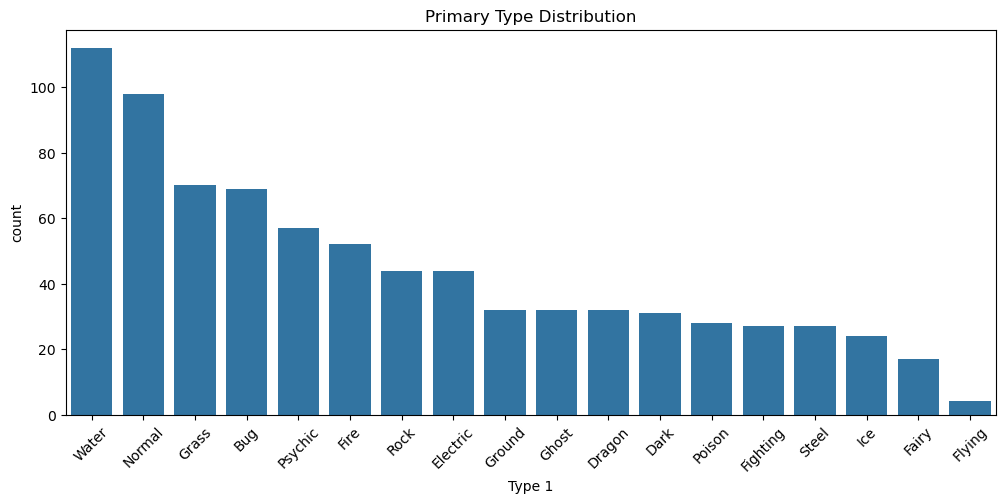

In [18]:
# Count Plot for Categorical Variables
plt.figure(figsize=(10, 4))
sns.countplot(x='Legendary', data=pokemon)
plt.title("Count of Legendary Pokémon")
plt.xlabel("Legendary")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(x='Type 1', data=pokemon, order=pokemon['Type 1'].value_counts().index)
plt.title("Primary Type Distribution")
plt.xticks(rotation=45)
plt.show()

In [19]:
# Count how many Pokémon are legendary
legendary_count = pokemon['Legendary'].sum()
print(f"Number of legendary Pokémon: {legendary_count}")

Number of legendary Pokémon: 65


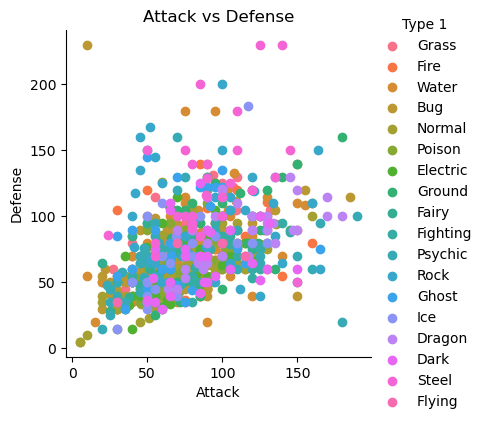

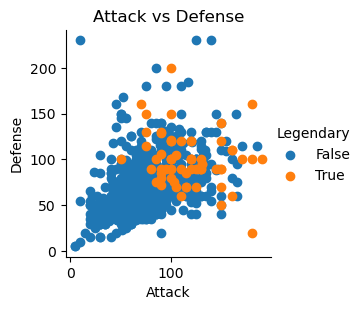

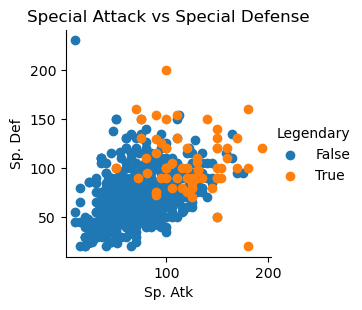

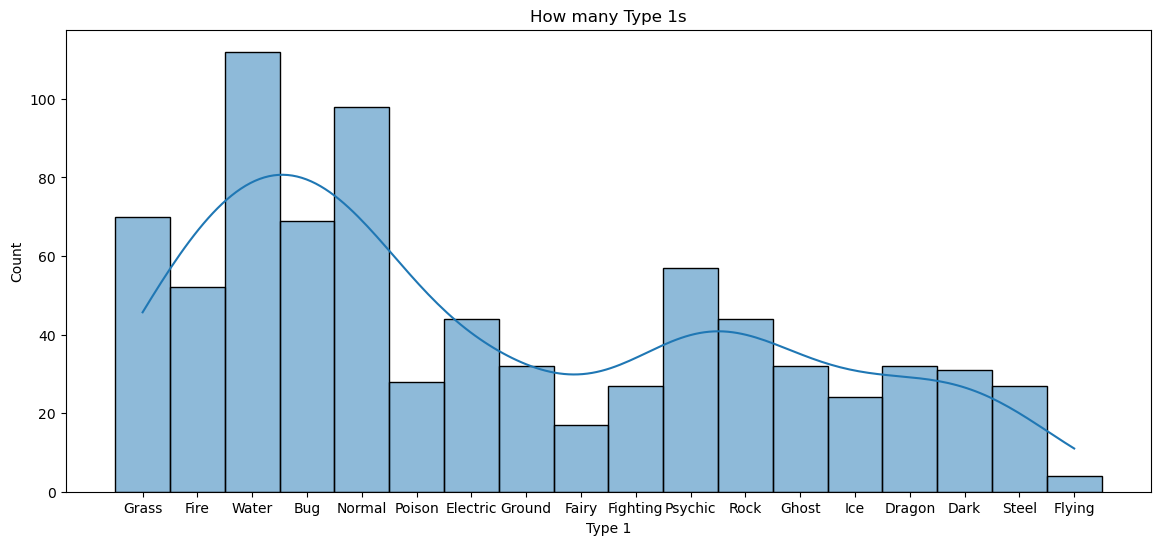

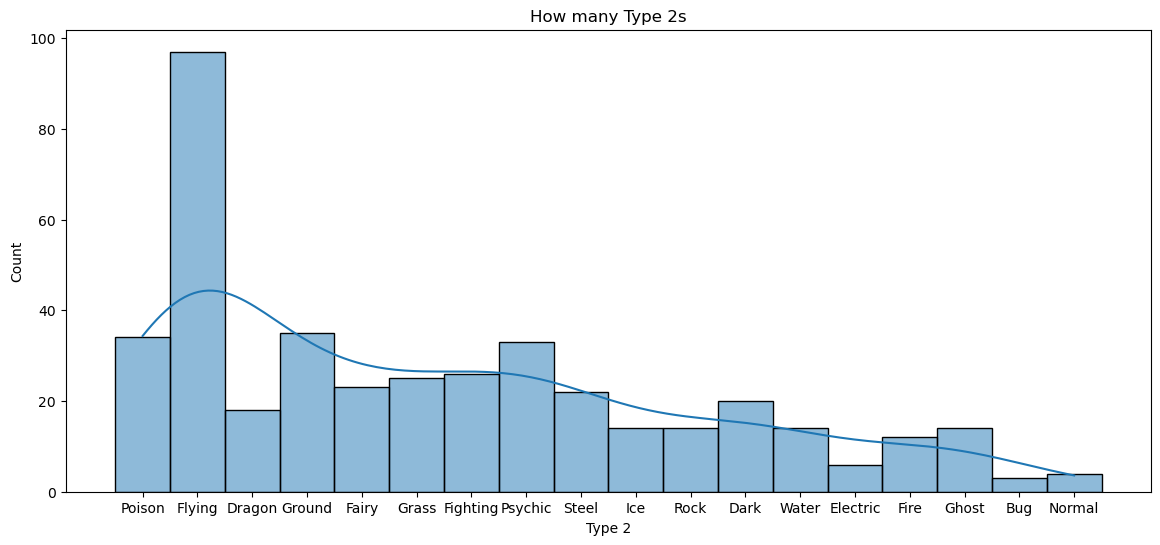

In [25]:
sns.FacetGrid(pokemon, hue="Type 1", height=4).map(plt.scatter, "Attack", "Defense").add_legend()
plt.title('Attack vs Defense')
plt.show()

sns.FacetGrid(pokemon, hue='Legendary', height=3).map(plt.scatter, "Attack", "Defense").add_legend()
plt.title('Attack vs Defense')

sns.FacetGrid(pokemon, hue='Legendary', height=3).map(plt.scatter, "Sp. Atk", "Sp. Def").add_legend()
plt.title('Special Attack vs Special Defense')
plt.show()

plt.figure(figsize=(14,6))
sns.histplot(pokemon["Type 1"], kde=True)
plt.title('How many Type 1s')
plt.show()

plt.figure(figsize=(14,6))
sns.histplot(pokemon["Type 2"],kde=True)
plt.title('How many Type 2s')
plt.show()



In [26]:
print('Number of Pokemon without a Type 2: {}'.format(sum(pokemon['Type 2'].isnull())))

Number of Pokemon without a Type 2: 386


In [27]:
pokemon.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [28]:
combat.describe()

,First_pokemon,Second_pokemon,Winner
count,50000.000000,50000.000000,50000.000000
mean,400.495640,403.159660,408.890100
std,229.549429,230.083644,231.159961
min,1.000000,1.000000,1.000000
25%,203.000000,207.000000,206.000000
50%,399.000000,402.000000,422.000000
75%,597.250000,602.000000,606.000000
max,800.000000,800.000000,800.000000


C:\Users\jsimo\AppData\Local\Temp\ipykernel_27056\280282716.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pokemon_n.replace({False: 0, True: 1}, inplace=True)


   Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
0       9      13  45      49       49       65       65     45           1   
1       9      13  60      62       63       80       80     60           1   
2       9      13  80      82       83      100      100     80           1   
3       9      13  80     100      123      122      120     80           1   
4       6      18  39      52       43       60       50     65           1   

   Legendary  
0          0  
1          0  
2          0  
3          0  
4          0  


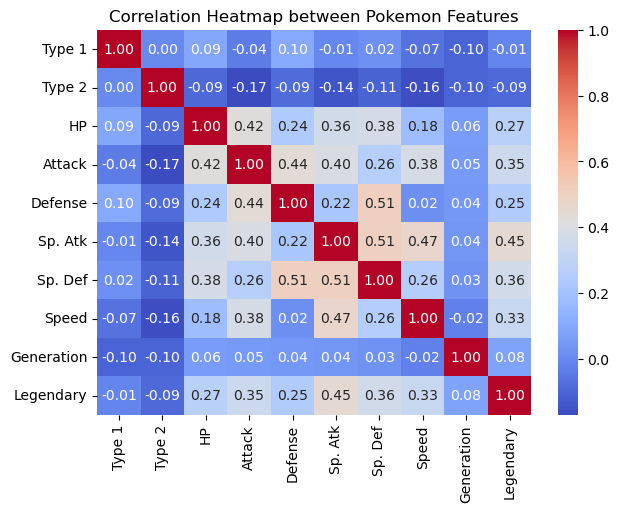

In [29]:
# Create a heatmap for the correlation matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

pokemon_n = pokemon
LE = LabelEncoder()
pokemon_n['Type 1'] = LE.fit_transform(pokemon_n['Type 1'])
pokemon_n['Type 2'] = LE.fit_transform(pokemon_n['Type 2'])

pokemon_n = pokemon_n.drop('Name', axis=1)
pokemon_n = pokemon_n.drop('#', axis=1)
pokemon_n.replace({False: 0, True: 1}, inplace=True)

print(pokemon_n.head())


correlation_matrix = pokemon_n.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Pokemon Features')
plt.show()

C:\Users\jsimo\AppData\Local\Temp\ipykernel_27056\2386410126.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pokemon_one.replace({False: 0, True: 1}, inplace=True)


   Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
0      13  45      49       49       65       65     45           1   
1      13  60      62       63       80       80     60           1   
2      13  80      82       83      100      100     80           1   
3      13  80     100      123      122      120     80           1   
4      18  39      52       43       60       50     65           1   

   Legendary  Type 1_0  ...  Type 1_8  Type 1_9  Type 1_10  Type 1_11  \
0          0         0  ...         0         1          0          0   
1          0         0  ...         0         1          0          0   
2          0         0  ...         0         1          0          0   
3          0         0  ...         0         1          0          0   
4          0         0  ...         0         0          0          0   

   Type 1_12  Type 1_13  Type 1_14  Type 1_15  Type 1_16  Type 1_17  
0          0          0          0          0          0        

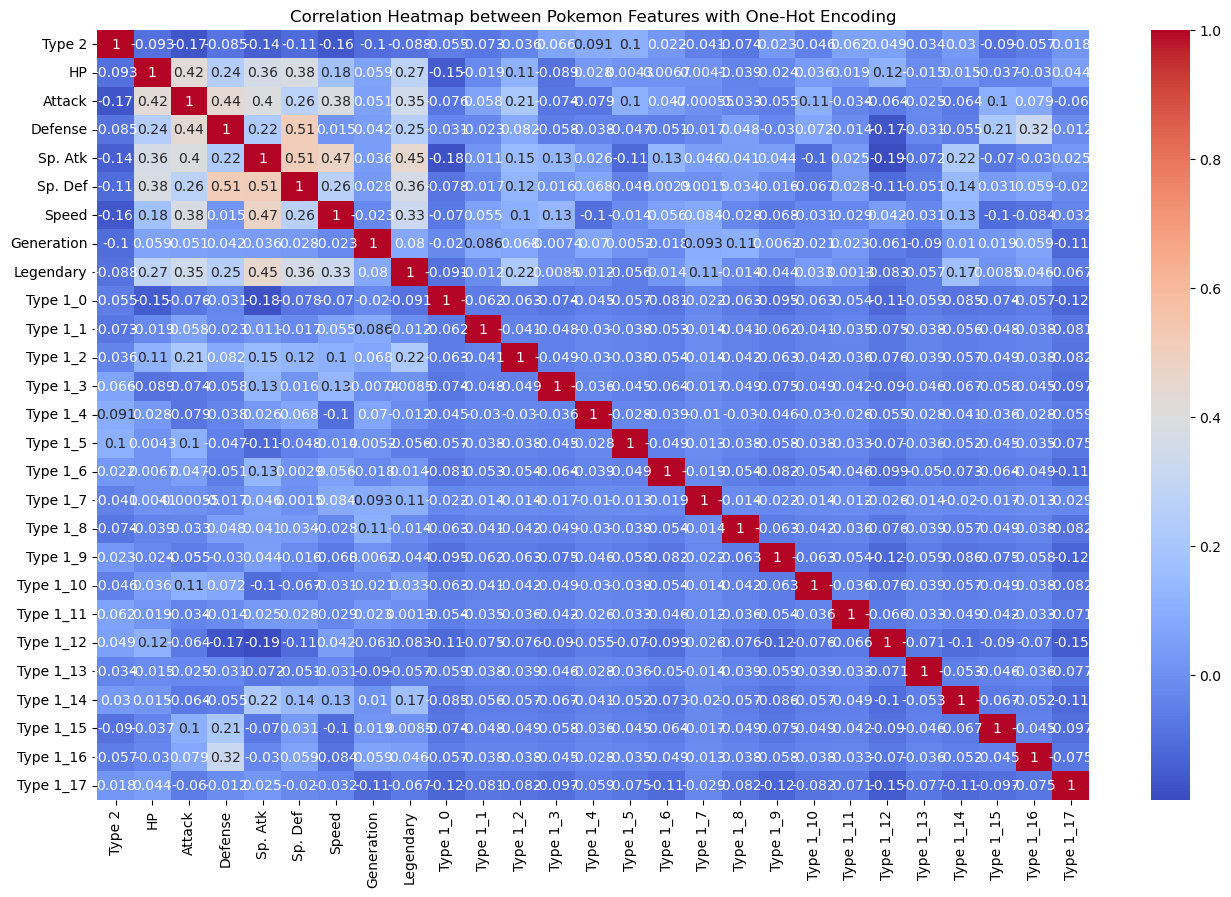

In [30]:
pokemon_one = pokemon

pokemon_one = pd.get_dummies(pokemon, columns=['Type 1', ])

pokemon_one.replace({False: 0, True: 1}, inplace=True)

pokemon_one = pokemon_one.drop('Name', axis=1)

pokemon_one = pokemon_one.drop('#', axis=1)

pokemone_one = pokemon_one.drop('Type 2', axis=1)


print(pokemon_one.head())

correlation_matrix2 = pokemon_one.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Pokemon Features with One-Hot Encoding')
plt.show()
